## <center> **Fake News Classification**

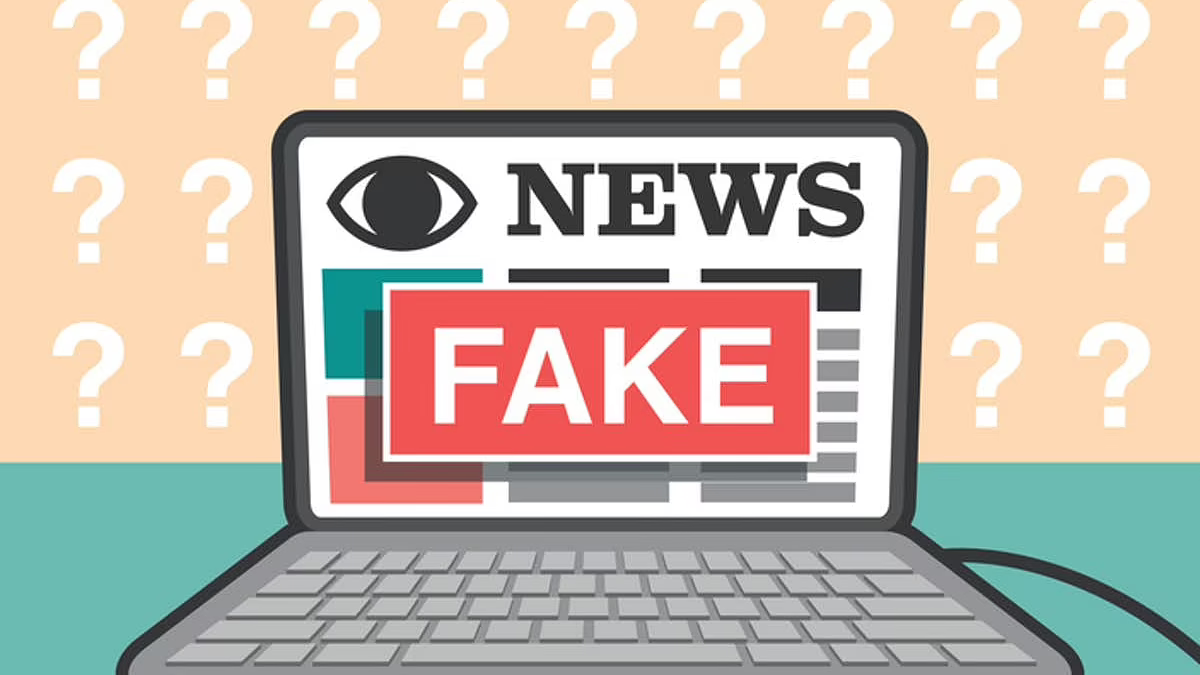

### **AIM : Training a Machine Learning Model that can classify Real and Fake News by reading the contents.**

#### **Importing All Necessary APIs**

In [1]:
import pandas as pd
import numpy as np
import re, nltk, stop_words
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix, classification_report

#### **Gathering Data**

In [2]:
fake = pd.read_csv('../input/fake-and-real-news-dataset/Fake.csv')
real = pd.read_csv('../input/fake-and-real-news-dataset/True.csv')
fake['fake?'] = 1
real['fake?'] = 0
df = pd.concat([fake,real])
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,title,text,subject,date,fake?
0,Highlights of Reuters interview with Trump,(Reuters) - Here are some of the highlights of...,politicsNews,"February 23, 2017",0
1,Trump Nominee: Press Could Have Saved Jews If...,Trump can t pick good people to save his life....,News,"December 20, 2016",1
2,DR GORKA EXPOSES THE COMMIES: One Word Susan R...,The weaponization of the security services is ...,Government News,"Apr 6, 2017",1
3,Zuma says South Africa's free higher education...,JOHANNESBURG (Reuters) - South Africa s govern...,worldnews,"December 16, 2017",0
4,When The View’s WHOOPI GOLDBERG Told Hillary W...,The sympathetic (and borderline communist) wom...,left-news,"Sep 14, 2017",1


#### **Data Cleaning : Removing Stop Words, Unnecessary Characters and Stemming**

In [3]:
def transformation(text):
    text = re.sub('[^A-Za-z]',' ',text)
    return ' '.join([nltk.stem.PorterStemmer().stem(word) for word in text.lower().split() if word not in stop_words.get_stop_words('english')])
text = df['text'].apply(transformation)
labels = df['fake?']

#### **Encoding words to numbers using Bag of Words**

In [4]:
vectorize = CountVectorizer(max_features=200,ngram_range=(1,3))
x = vectorize.fit_transform(text).toarray()
y = np.array(labels)

#### **Spliting dataset for Training and Testing**

In [5]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2,random_state=34)
print('\nTotal number of samples in the Train Dataset :',xtrain.shape[0])
print('Total number of samples in the Test Dataset :',xtest.shape[0])


Total number of samples in the Train Dataset : 35918
Total number of samples in the Test Dataset : 8980


#### **Training Bernoulli Naive Bayes Classification Model**

In [7]:
bnb = BernoulliNB().fit(xtrain,ytrain)
print('\nAccuracy score :',bnb.score(xtest,ytest))


Accuracy score : 0.9776169265033408


#### **Performance Analysis of Model**

In [9]:
ypred = bnb.predict(xtest)
print('Confusion Metrics : \n\n',confusion_matrix(ytest,ypred),'\n\n')
print('Classification Report :\n\n',classification_report(ytest,ypred))

Confusion Metrics : 

 [[4312   82]
 [ 119 4467]] 


Classification Report :

               precision    recall  f1-score   support

           0       0.97      0.98      0.98      4394
           1       0.98      0.97      0.98      4586

    accuracy                           0.98      8980
   macro avg       0.98      0.98      0.98      8980
weighted avg       0.98      0.98      0.98      8980



#### **Defining the function that checks the News and return weather it is Fake or Real**

In [10]:
def predict(text):
    text = transformation(text)
    text = vectorize.transform([text])
    if bnb.predict(text)[0] == 1:
        print('This is fake news.')
    else:
        print('This is real news.')

#### **Testing the Function and Classification of News - Real or Fake?**

In [11]:
corpus1 = '''One of Donald Trump s favorite punching bags is CNN. He even once tweeted a GIF image of himself punching a person with a CNN logo superimposed over the head 
            indicating that he d like to enact violence against CNN s reporters. Then there was the time he tweeted the  Trump Train roaring over  CNN.  Now, he s back at it 
            this time suggesting that  fake  CNN should be the ones representing America to the world, and that they are doing a bad job. Here is that tweet:.@FoxNews 
            is MUCH more important in the United States than CNN, but outside of the U.S., CNN International is still a major source of (Fake) news, and they represent
            our Nation to the WORLD very poorly. The outside world does not see the truth from them!  Donald J. Trump (@realDonaldTrump) November 25, 2017Of course, 
            it is beneath the dignity of most people to respond to a moronic buffoon like Trump under normal circumstances. However, he is currently squatting in the 
            White House, and has his tiny orange hands on the levers of power   not to mention the nuclear codes   so they have to stoop to a Trumpian level when 
            personally attacked. However, being, well, you know, FIT to be doing the job they are doing, the good folks at CNN Communications fired back at Trump, and 
            their response is nothing short of perfect:It's not CNN's job to represent the U.S to the world. That's yours. Our job is to report the news. #FactsFirst   
            CNN Communications (@CNNPR) November 25, 2017BOOM! Couldn t have asked for a sicker burn than this. And they are right of course   especially the part about
            #FactsFirst. Trump has a problem with the truth, as we all well know. That s what makes what the CNN Communications people replied so fabulous. 
            It is the ultimate truth   something the likes of the pathological orange liar that is Donald Trump knows nothing about.Featured image via  
            Andrew Burton/Getty Images '''



corpus2 = '''WASHINGTON (Reuters) - The No. 2 Republican in the U.S. House of Representatives said on Tuesday the House would likely need to vote again on tax
            legislation on Wednesday morning given that Democrats in the Senate were likely to prevail on a procedural objection. House Majority Leader Kevin McCarthy 
            advised House lawmakers that Senate Democrats were likely to object that the legislation fails to comply with the so-called Byrd rule and were likely to be
            upheld, necessitating a second House vote. “As such, members are further advised that an additional procedural vote on the Motion to Concur is expected 
                tomorrow morning, which will clear the bill for President Trump’s signature,” McCarthy said in a notice to House lawmakers. '''

predict(corpus1)
predict(corpus2)

This is fake news.
This is real news.


# <center> **Thank You**